In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
import os
os.chdir("/Users/yanvisoni/Downloads")
market=pd.read_csv('marketing_campaign.csv', delimiter=";")
market

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


# Data Cleaning

In [3]:
#Check for Missing Values
market.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [4]:
# Performing list-wise deletion to drop null values
market=market.dropna()

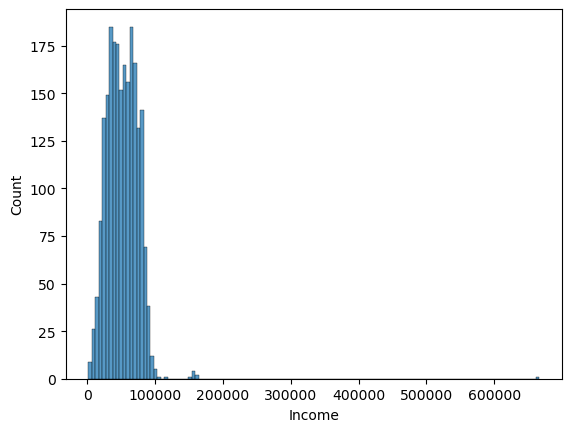

In [5]:
# Checking out the distribution of income
sns.histplot(data=market , x='Income')
plt.show()

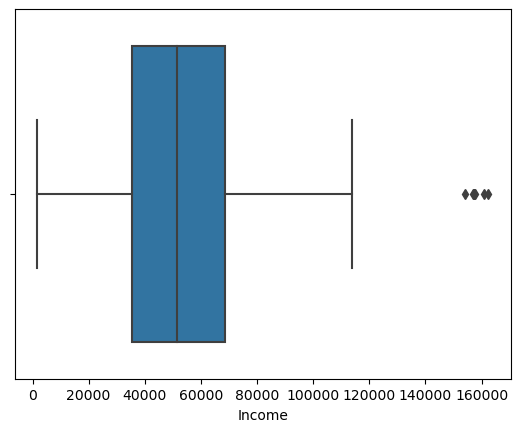

In [8]:
# Removing the outlier by removing values that are more than 200,000
market=market[market['Income']<=200000]
sns.boxplot(data = market, x = 'Income')
plt.show()

# Research Questions

# Campaign Response Over Time -- Are there any trends or changes in campaign acceptance rates over time?

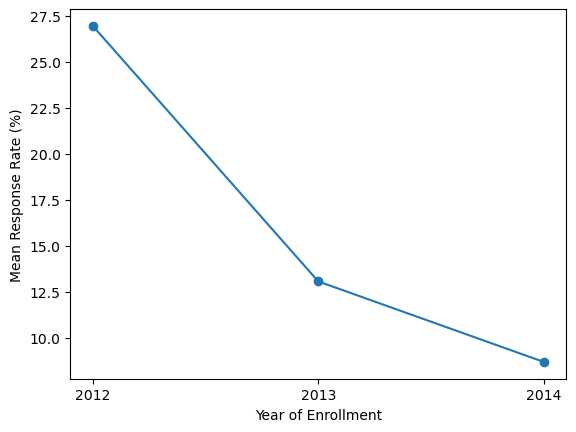

In [27]:
# Convert date columns to datetime
market['Dt_Customer'] = pd.to_datetime(market['Dt_Customer'])

market['YearEnrollment'] = market['Dt_Customer'].dt.year
response_by_year = market.groupby('YearEnrollment')['Response'].mean()

# Convert mean response rate to percentage
response_percentage = response_by_year * 100

# Plotting
plt.plot(response_percentage.index, response_percentage.values, marker='o')
plt.xlabel('Year of Enrollment')
plt.ylabel('Mean Response Rate (%)')

# Set the x-axis ticks to display only integer years
plt.xticks(response_percentage.index.astype(int))

plt.show()

# How does the level of education influence customer acceptance in marketing campaigns?

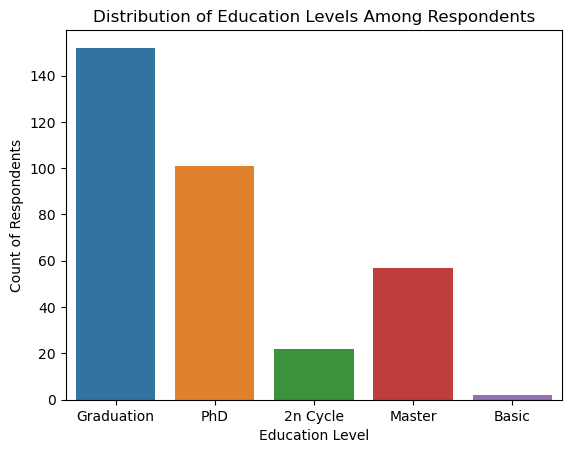

In [36]:
market_responded = market[market['Response'] == 1]

sns.countplot(x='Education', data=market_responded)
plt.title('Distribution of Education Levels Among Respondents')
plt.xlabel('Education Level')
plt.ylabel('Count of Respondents')
plt.show()

# Do customers with different numbers of small children in their households exhibit significantly different levels of spending on sweet products?

In [42]:
from scipy.stats import shapiro, kruskal

# Normality test using Shapiro-Wilk
shapiro_results = []
for group_name, group_data in market.groupby('Kidhome')['MntSweetProducts']:
    stat, p_value = shapiro(group_data)
    print(f"Shapiro-Wilk Test for {group_name}: p-value = {p_value}")
    shapiro_results.append(p_value)

print("\nThe normality assumption is violated for at all groups.")
    
# One-way Kruskal-Wallis test
kruskal_result = kruskal(*[group['MntSweetProducts'] for name, group in market.groupby('Kidhome')])

# Print the Kruskal-Wallis result
print("\nKruskal-Wallis Result:")
print("H-statistic:", kruskal_result.statistic)
print("P-value:", kruskal_result.pvalue)

if kruskal_result.pvalue < 0.05:
    print("There is a significant difference in spending on sweet products based on the number of small children in households.")
else:
    print("There is no significant difference in spending on sweet products based on the number of small children in households.")


Shapiro-Wilk Test for 0: p-value = 1.0433192161458815e-36
Shapiro-Wilk Test for 1: p-value = 0.0
Shapiro-Wilk Test for 2: p-value = 4.247046724720205e-12

The normality assumption is violated for at all  groups.

Kruskal-Wallis Result:
H-statistic: 431.10985713937123
P-value: 2.4304348008923333e-94
There is a significant difference in spending on sweet products based on the number of small children in households.


# How does the spending on different product categories vary with income?

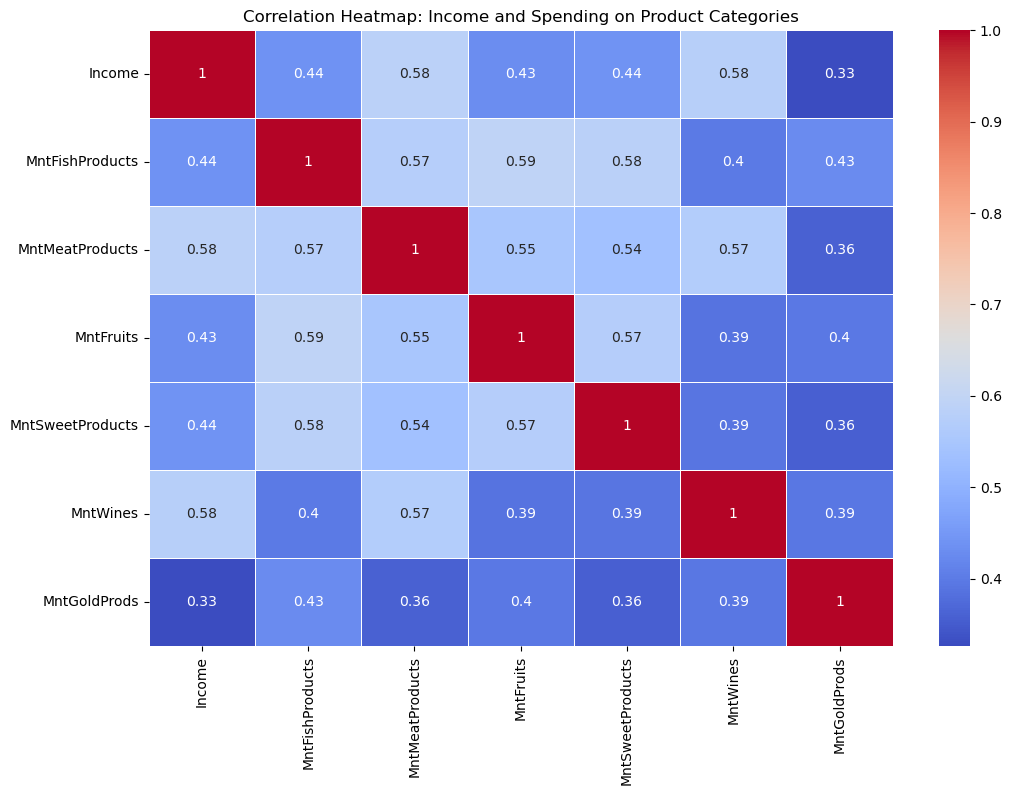

In [51]:
# Select relevant columns
selected_columns = ['Income', 'MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds']

# Create a subset DataFrame with the selected columns
subset_df = market[selected_columns].dropna()

# Create a heatmap to visualize correlations
correlation_matrix = subset_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap: Income and Spending on Product Categories')
plt.show()


# Do customers exhibit different spending patterns during specific seasons?

/var/folders/bj/g3162cys2w3b7h3lh7vh41yc0000gn/T/ipykernel_68164/4037971556.py:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  seasonal_spending = market.groupby(['Season']).mean().loc[:, spending_columns]


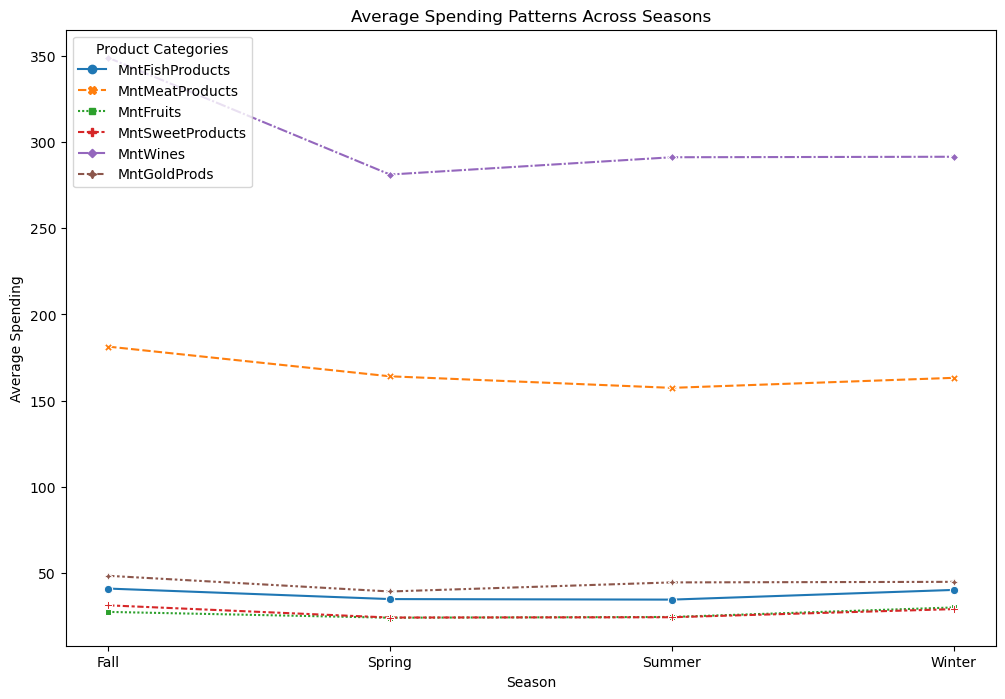

Text Interpretation:
The line plot above illustrates the average spending patterns across different product categories during each season.
Key Findings:
- The category 'MntFishProducts' has the highest average spending during Fall with an average spending of 40.78.
- The category 'MntMeatProducts' has the highest average spending during Fall with an average spending of 181.32.
- The category 'MntFruits' has the highest average spending during Winter with an average spending of 29.81.
- The category 'MntSweetProducts' has the highest average spending during Fall with an average spending of 31.05.
- The category 'MntWines' has the highest average spending during Fall with an average spending of 349.13.
- The category 'MntGoldProds' has the highest average spending during Fall with an average spending of 48.20.


In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# Replace 'YourDataset.csv' with your actual dataset file or data source
# df = pd.read_csv('YourDataset.csv')

# Convert 'DtCustomer' to datetime format
market['Dt_Customer'] = pd.to_datetime(market['Dt_Customer'])

# Extract the season from the date
market['Season'] = market['Dt_Customer'].dt.month % 12 // 3 + 1

# Create a season mapping for better interpretation
season_mapping = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
market['Season'] = market['Season'].map(season_mapping)

# Define spending columns
spending_columns = ['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds']

# Analyze spending patterns during different seasons
seasonal_spending = market.groupby(['Season']).mean().loc[:, spending_columns]

# Plotting
plt.figure(figsize=(12, 8))
sns.lineplot(data=seasonal_spending, markers=True)
plt.title('Average Spending Patterns Across Seasons')
plt.xlabel('Season')
plt.ylabel('Average Spending')
plt.legend(title='Product Categories', loc='upper left')
plt.show()

# Interpretation
print("Text Interpretation:")
print("The line plot above illustrates the average spending patterns across different product categories during each season.")
print("Key Findings:")
for category in spending_columns:
    season_with_max_spending = seasonal_spending[category].idxmax()
    max_spending_value = seasonal_spending[category].max()
    print(f"- The category '{category}' has the highest average spending during {season_with_max_spending} with an average spending of {max_spending_value:.2f}.")